# Data Visualization Functions Without Seaborn
This notebook contains Python functions for data visualization without using Seaborn. These functions will create scatter plots based on different criteria such as year and month, as well as perform linear regression analysis.
The functions are:
1. Scatter plot colored by year
2. Scatter plot colored by month
3. Scatter plot with linear regression and R^2 value

In [ ]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

## 1. Scatter Plot Colored by Year
This function will create a scatter plot of two columns from a DataFrame, where each point is colored based on the year.

In [ ]:
# Function to create scatter plot colored by year without using seaborn
def scatter_by_year(df, x_col, y_col, date_col):
    """Create a scatter plot of two columns colored by year.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the x-axis column.
        y_col (str): The name of the y-axis column.
        date_col (str): The name of the date column.
    """
    # Extract year from date column
    df['Year'] = pd.to_datetime(df[date_col]).dt.year

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    years = df['Year'].unique()
    for year in years:
        subset = df[df['Year'] == year]
        plt.scatter(subset[x_col], subset[y_col], label=year)

    plt.legend(title='Year', loc='upper left')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col} by Year')
    plt.show()

## 2. Scatter Plot Colored by Month
This function will create a scatter plot of two columns from a DataFrame, where each point is colored based on the month.

In [ ]:
# Function to create scatter plot colored by month without using seaborn
def scatter_by_month(df, x_col, y_col, date_col):
    """Create a scatter plot of two columns colored by month.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the x-axis column.
        y_col (str): The name of the y-axis column.
        date_col (str): The name of the date column.
    """
    # Extract month from date column
    df['Month'] = pd.to_datetime(df[date_col]).dt.month

    # Create scatter plot
    plt.figure(figsize=(10, 6))
    months = df['Month'].unique()
    for month in months:
        subset = df[df['Month'] == month]
        plt.scatter(subset[x_col], subset[y_col], label=month)

    plt.legend(title='Month', loc='upper left')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col} by Month')
    plt.show()

## 3. Scatter Plot with Linear Regression and R^2 Value
This function will create a scatter plot of two columns from a DataFrame and overlay a linear regression line. It will also display the R^2 value in the legend.

In [ ]:
# Function to create scatter plot with linear regression and R^2 value without using seaborn
def scatter_with_regression(df, x_col, y_col):
    """Create a scatter plot with a linear regression line and R^2 value.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the x-axis column.
        y_col (str): The name of the y-axis column.
    """
    # Prepare data
    X = df[[x_col]].values
    y = df[y_col].values

    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Create scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='red', label=f'Regression Line (R^2 = {r2:.2f})')
    plt.legend(title='Legend', loc='upper left')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col} with Linear Regression')
    plt.show()

## Sample Data for Testing
Let's create some sample data to test these functions.

In [ ]:
# Creating sample data
np.random.seed(0)
n = 100
x = np.linspace(0, 10, n)
y = 3 * x + np.random.randn(n) * 5
dates = pd.date_range('2021-01-01', periods=n, freq='M')

# Creating DataFrame
df_sample = pd.DataFrame({'X': x, 'Y': y, 'Date': dates})
df_sample.head()

## Testing the Functions
Let's test the functions using the sample data.

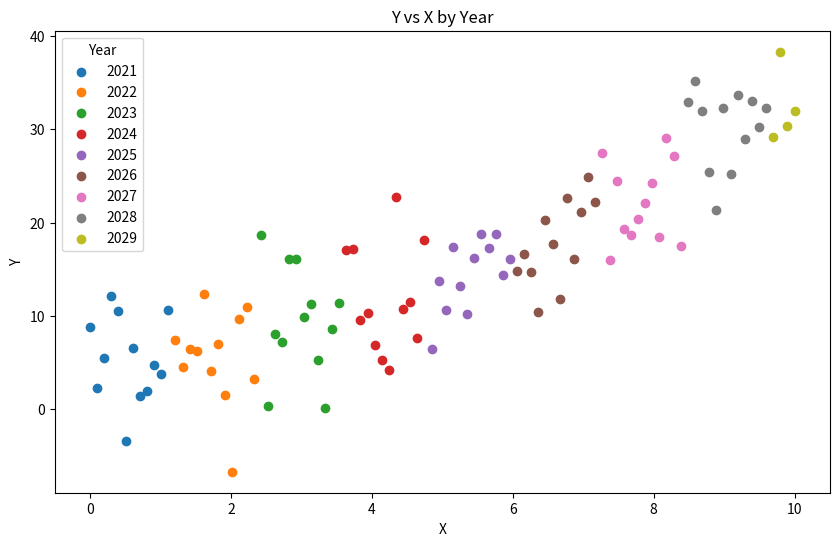

In [ ]:
# Testing scatter_by_year function
scatter_by_year(df_sample, 'X', 'Y', 'Date')

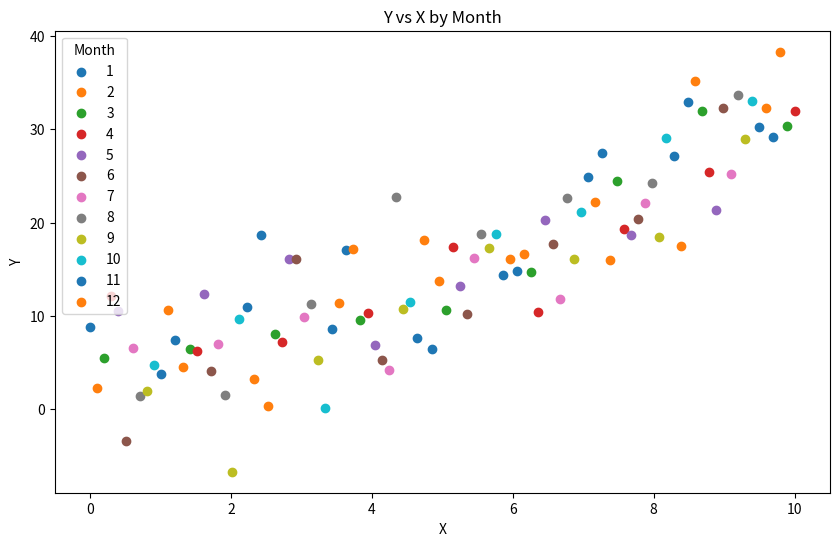

In [ ]:
# Testing scatter_by_month function
scatter_by_month(df_sample, 'X', 'Y', 'Date')

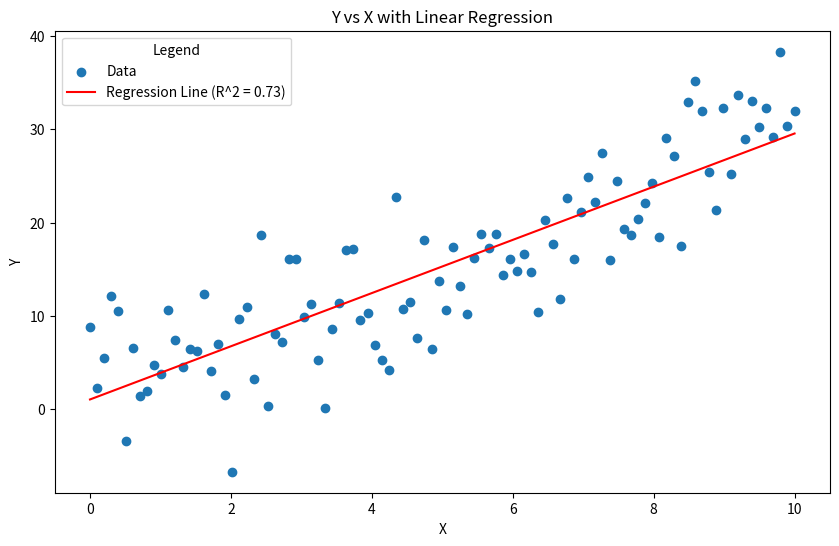

In [ ]:
# Testing scatter_with_regression function
scatter_with_regression(df_sample, 'X', 'Y')

## 4. Scatter Plot with Custom Linear Regression and R^2 Value
This function will create a scatter plot of two columns from a DataFrame and overlay a custom linear regression line calculated without using sklearn. It will also display the R^2 value in the legend.

In [ ]:
# Function to perform custom linear regression without using sklearn
def custom_linear_regression(X, y):
    """Perform linear regression without using sklearn.

    Parameters:
        X (np.array): The independent variable.
        y (np.array): The dependent variable.

    Returns:
        tuple: Slope and intercept of the regression line.
    """
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(y)
    sum_x_squared = np.sum(X ** 2)
    sum_xy = np.sum(X * y)

    # Calculate slope (m) and intercept (b)
    m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
    b = (sum_y - m * sum_x) / n

    return m, b

# Function to calculate R^2 value without using sklearn
def custom_r2(X, y, m, b):
    """Calculate R^2 value without using sklearn.

    Parameters:
        X (np.array): The independent variable.
        y (np.array): The dependent variable.
        m (float): The slope of the regression line.
        b (float): The intercept of the regression line.

    Returns:
        float: The R^2 value.
    """
    y_pred = m * X + b
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_res = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_total)
    return r2

# Function to create scatter plot with custom linear regression and R^2 value
def scatter_with_custom_regression(df, x_col, y_col):
    """Create a scatter plot with a custom linear regression line and R^2 value.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        x_col (str): The name of the x-axis column.
        y_col (str): The name of the y-axis column.
    """
    # Prepare data
    X = df[x_col].values
    y = df[y_col].values

    # Perform custom linear regression
    m, b = custom_linear_regression(X, y)
    y_pred = m * X + b
    r2 = custom_r2(X, y, m, b)

    # Create scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label='Data')
    plt.plot(X, y_pred, color='red', label=f'Custom Regression Line (R^2 = {r2:.2f})')
    plt.legend(title='Legend', loc='upper left')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'{y_col} vs {x_col} with Custom Linear Regression')
    plt.show()

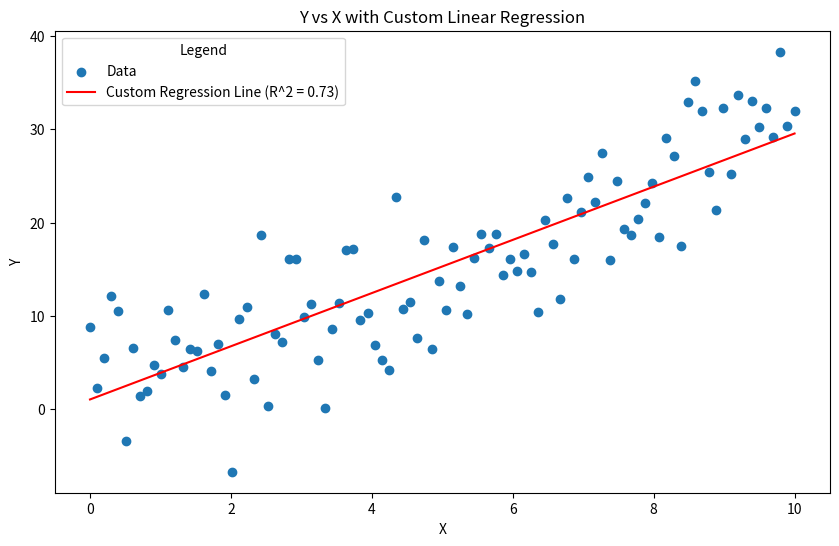

In [ ]:
# Testing scatter_with_custom_regression function
scatter_with_custom_regression(df_sample, 'X', 'Y')

## Pivot Data and Average Values
The following functions will pivot the data by month and year, respectively, and average the values.

In [ ]:
# Function to pivot data by month and average the values
def pivot_by_month(df, value_col, date_col):
    """Pivot data by month and average the values.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        value_col (str): The column containing the values to be averaged.
        date_col (str): The column containing the date information.

    Returns:
        pd.DataFrame: The pivoted DataFrame.
    """
    df['Month'] = pd.to_datetime(df[date_col]).dt.month
    df_pivot = df.pivot_table(values=value_col, index='Month', aggfunc='mean').reset_index()
    return df_pivot

# Function to pivot data by year and average the values
def pivot_by_year(df, value_col, date_col):
    """Pivot data by year and average the values.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        value_col (str): The column containing the values to be averaged.
        date_col (str): The column containing the date information.

    Returns:
        pd.DataFrame: The pivoted DataFrame.
    """
    df['Year'] = pd.to_datetime(df[date_col]).dt.year
    df_pivot = df.pivot_table(values=value_col, index='Year', aggfunc='mean').reset_index()
    return df_pivot

## Testing Pivot Functions
Let's test the pivot functions using the sample data.

In [ ]:
# Testing pivot_by_month function
pivot_by_month(df_sample, 'Y', 'Date')

In [ ]:
# Testing pivot_by_year function
pivot_by_year(df_sample, 'Y', 'Date')